<a href="https://colab.research.google.com/github/aayush-1/Deep-Learning-Scratch/blob/master/Sansan_Indian_Student_Internship_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test of Sansan R&D Internship

Thank you for your application to Sansan R&D summer internship program.
We would like to know your coding skill and approch to NLP task.
We will ask questions regarding this notebook during an interview.

Please spend about 60 minutes on the entire cording test.


Student name: Aayush Arora

Department: Electrical Engineering and Minor in Computer Science and Engineering




## Test Description

This experiment aims to predict a news category.

There are 3 steps in this test.
Please modify this notebook and add comments as markdown cells.

## Step. 1: Complete evaluations
Go to Evaluation and complete classification evaluation codes.

## Step. 2: Add data analysis
Exploratory data analysis in this notebook shows Classes, Samples total, Data type, Class names and Class histograms.
Please add some exploratory data analysis and write your understanding about the data from your analysis.

## Step. 3: Improve classification
The example is a simple baseline method.
Please modify this notebook to improve classification metric scores.

For example, add preprocessing, change classification method, search an optimal parameter.

## Advanced task
If you have time, deep learning method may improve performance.
Change the runtime type for using GPU(Hardware accelerator) and try it.



## Preparing modules and dataset

20 Newsgroups [scikit-learn refference](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html), [Official](http://qwone.com/~jason/20Newsgroups/)

In [0]:
import re
from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
# for word count
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix


%matplotlib inline

In [0]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

## Exploratory data analyis

In [5]:
print(newsgroups_train.keys())
print(newsgroups_test.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [8]:
print("Classes", len(newsgroups_train.target_names))
print("Samples total", len(newsgroups_train.data) + len(newsgroups_test.data))
print("Data type", type(newsgroups_train.data[0]))

Classes 20
Samples total 18846
Data type <class 'str'>


In [9]:
index_target_name = {i: target_name for i, target_name in enumerate(newsgroups_train.target_names)}
pprint(index_target_name)

{0: 'alt.atheism',
 1: 'comp.graphics',
 2: 'comp.os.ms-windows.misc',
 3: 'comp.sys.ibm.pc.hardware',
 4: 'comp.sys.mac.hardware',
 5: 'comp.windows.x',
 6: 'misc.forsale',
 7: 'rec.autos',
 8: 'rec.motorcycles',
 9: 'rec.sport.baseball',
 10: 'rec.sport.hockey',
 11: 'sci.crypt',
 12: 'sci.electronics',
 13: 'sci.med',
 14: 'sci.space',
 15: 'soc.religion.christian',
 16: 'talk.politics.guns',
 17: 'talk.politics.mideast',
 18: 'talk.politics.misc',
 19: 'talk.religion.misc'}


Counter({10: 600,
         15: 599,
         8: 598,
         9: 597,
         11: 595,
         7: 594,
         13: 594,
         14: 593,
         5: 593,
         2: 591,
         12: 591,
         3: 590,
         6: 585,
         1: 584,
         4: 578,
         17: 564,
         16: 546,
         0: 480,
         18: 465,
         19: 377})


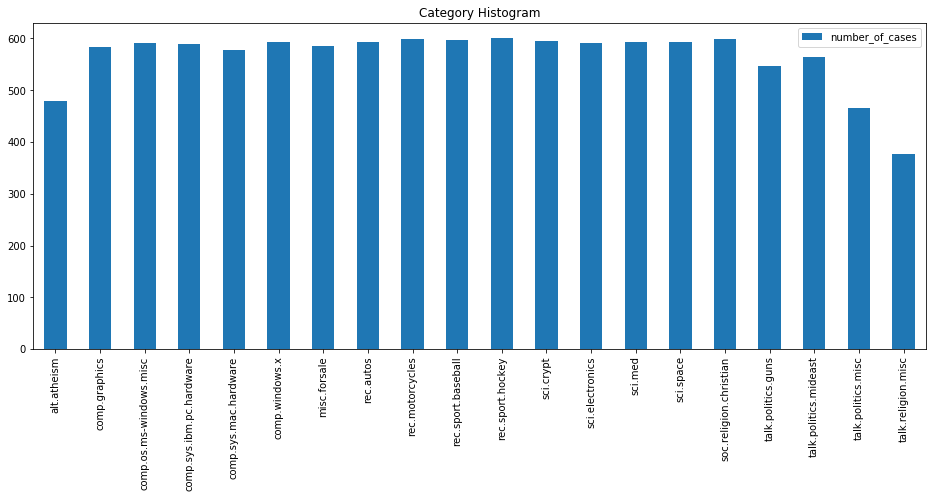

In [31]:
counted = Counter(newsgroups_train.target)
pprint(counted)
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)

pd.DataFrame(
        counted.values(), index=counted.keys()
    ).rename(
        index=index_target_name,
        columns={0: 'number_of_cases'}
    ).sort_index().plot(kind="bar", title="Category Histogram", ax=ax)
plt.show()

In the step 2, please add your data analysis to below.
For example, counting high frequency word.

In [68]:
print("******************************************************************************")
print(newsgroups_train.data[23])
print("******************************************************************************")
print(newsgroups_train.target[21])

******************************************************************************
From: csyphers@uafhp..uark.edu (Chris Syphers)
Subject: Re: ?? DOS font size in windows??
Organization: Kansas State University
Lines: 20
NNTP-Posting-Host: uafhp.uark.edu

ssa@unity.ncsu.edu (S. Alavi) writes:


>	I have an 8514/A card, and I am using windows in 1024x768 mode 
>	(normal 8514/A font, not small).  In the 386 enhanced mode
>	the DOS window font is too small for my 14" monitor. Is there a 
>	way to spacify the font size for the DOS window? You'll have to 
>	excuse me if there is a trivial answer, since I am fairly new to
>	MS Windows world.

>	Thanks.

>	(Please include this message for reference)
>	======  S. Alavi    [ssa@unity.ncsu.edu]  (919)467-7909 (H)  ========
>						  (919)515-8063 (W)
The control box of the Window itself (upper left corner of the window, single
click, am I being too simplistic?) has a font option. The 8 X 12 is about the
biggest one I can use without the characters tu

Analysis:


*   Lot of email IDs and names which are not necessary
*   excessive use of commas, apostrophes, quotes, question marks and some symbols such as <, >, / etc.


*   Use of repititive words such as From, Subject, Organization, Lines etc in every write up.
*   Consist of several numbers which are irrelevent to the classification task.





In [0]:
# write your code

# remove email address
lst = [re.findall('\S+@\S+', s) for s in newsgroups_train.data]
for x in lst:
  x.append('From:')
  x.append('Subject:')
  x.append('Organization:')
  x.append('Lines:')
  
data0=[]
for i in range(len(newsgroups_train.data)):
  words=newsgroups_train.data[i].split()
  a=[x for x in words if x not in lst[i]]
  result = ' '.join(a)
  data0.append(result)



The above code removes email IDs and words appearing in every document. Further we will tokenize the data and remove punctuation symbols. I used re.split() to tokenize because word_tokenize() function only split words by spaces and not by punctuation symbols.
The words are stemmed so that the focus lies on sentiment of the word and also to reduce vocabulary.


Earlier the most frequent words were the stopping_words but on removing them we can visualize the frequency of other words properly.

On checking,there were many redundant words in some of the data files, whose frequency was really high such as "ax" and "nntp", hence these were also removed from the data.



In [0]:
#split into words 
data1=[re.split(r'\W+', x) for x in data0]

#remove punctuations and filter stop words
data2=[]
stop_words = stopwords.words('english')
for i in range(len(data1)):
  a=[x.lower() for x in data1[i] if x.isalpha() and x.lower() not in stop_words]
  data2.append(a)

#stem words (optional and might reduce number of words)
data=[]
lst=['ax','nntp','max']
for i in range(len(data2)):
  stemmed = [porter.stem(x) for x in data2[i]]
  a=[x for x in stemmed if x not in lst]
  result = ' '.join(a)
  data.append(result)



In [108]:


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

inds=np.argsort(X.toarray().sum(axis=0))
word_frequency=np.sort(X.toarray().sum(axis=0))[::-1]
word=np.array(vectorizer.get_feature_names())[inds][::-1]
print(X.toarray().shape)
print(word[:20])
print(word_frequency[:20])

(11314, 54940)
['one' 'use' 'would' 'write' 'articl' 'post' 'like' 'get' 'peopl'
 'univers' 'know' 'time' 'think' 'host' 'say' 'go' 'make' 'also' 'system'
 'work']
[9485 9418 8905 8818 7700 7688 6584 6319 6028 6028 5717 5193 5140 5027
 4671 4483 4333 4305 4107 4072]


## Building Classifier
In the step 3, please modify code to improve classification.


In [0]:
def preprocessor(text):
    # text = re.sub(r"pattern", "repl", text)
    return text

In [0]:
steps = [
         ('tfidf_vect', TfidfVectorizer(preprocessor=preprocessor, lowercase=False, stop_words=None)),
         ('clf', SGDClassifier())
]
pipeline = Pipeline(steps)

In [0]:
pipeline.fit(
    X=newsgroups_train.data, 
    y=newsgroups_train.target
)

In [0]:
# modify or write your code

## Evaluation

In the step 1, please complete and run this evaluation code.

Reference of [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [0]:
# fill and modify this code
y_pred = # fill a code
y_true = # fill a code
target_names = # fill a code

print(
    classification_report(
        y_true,
        y_pred,
        target_names=target_names
    )
)

In [0]:
estimator = # fill code
X = # fill code

fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(1, 1, 1)

disp = plot_confusion_matrix(
    estimator=estimator,
    X=X,
    y_true=y_true,
    display_labels=target_names,
    cmap=plt.cm.Blues,
    xticks_rotation='vertical',
    ax=ax,
    normalize='true'
)
disp.ax_.set_title("Confusion Matrix")

plt.show()

If you want to evaluate another way, please write code below.

In [0]:
# write your code

# Advanced task

In the advanced step, try deep learning model!
(Only when it took less that an hour to solve the above 3 steps, please try the additional task.)

In [0]:
# write your code